In [1]:
import matplotlib.pyplot as plt
import os
from PIL import Image 
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms

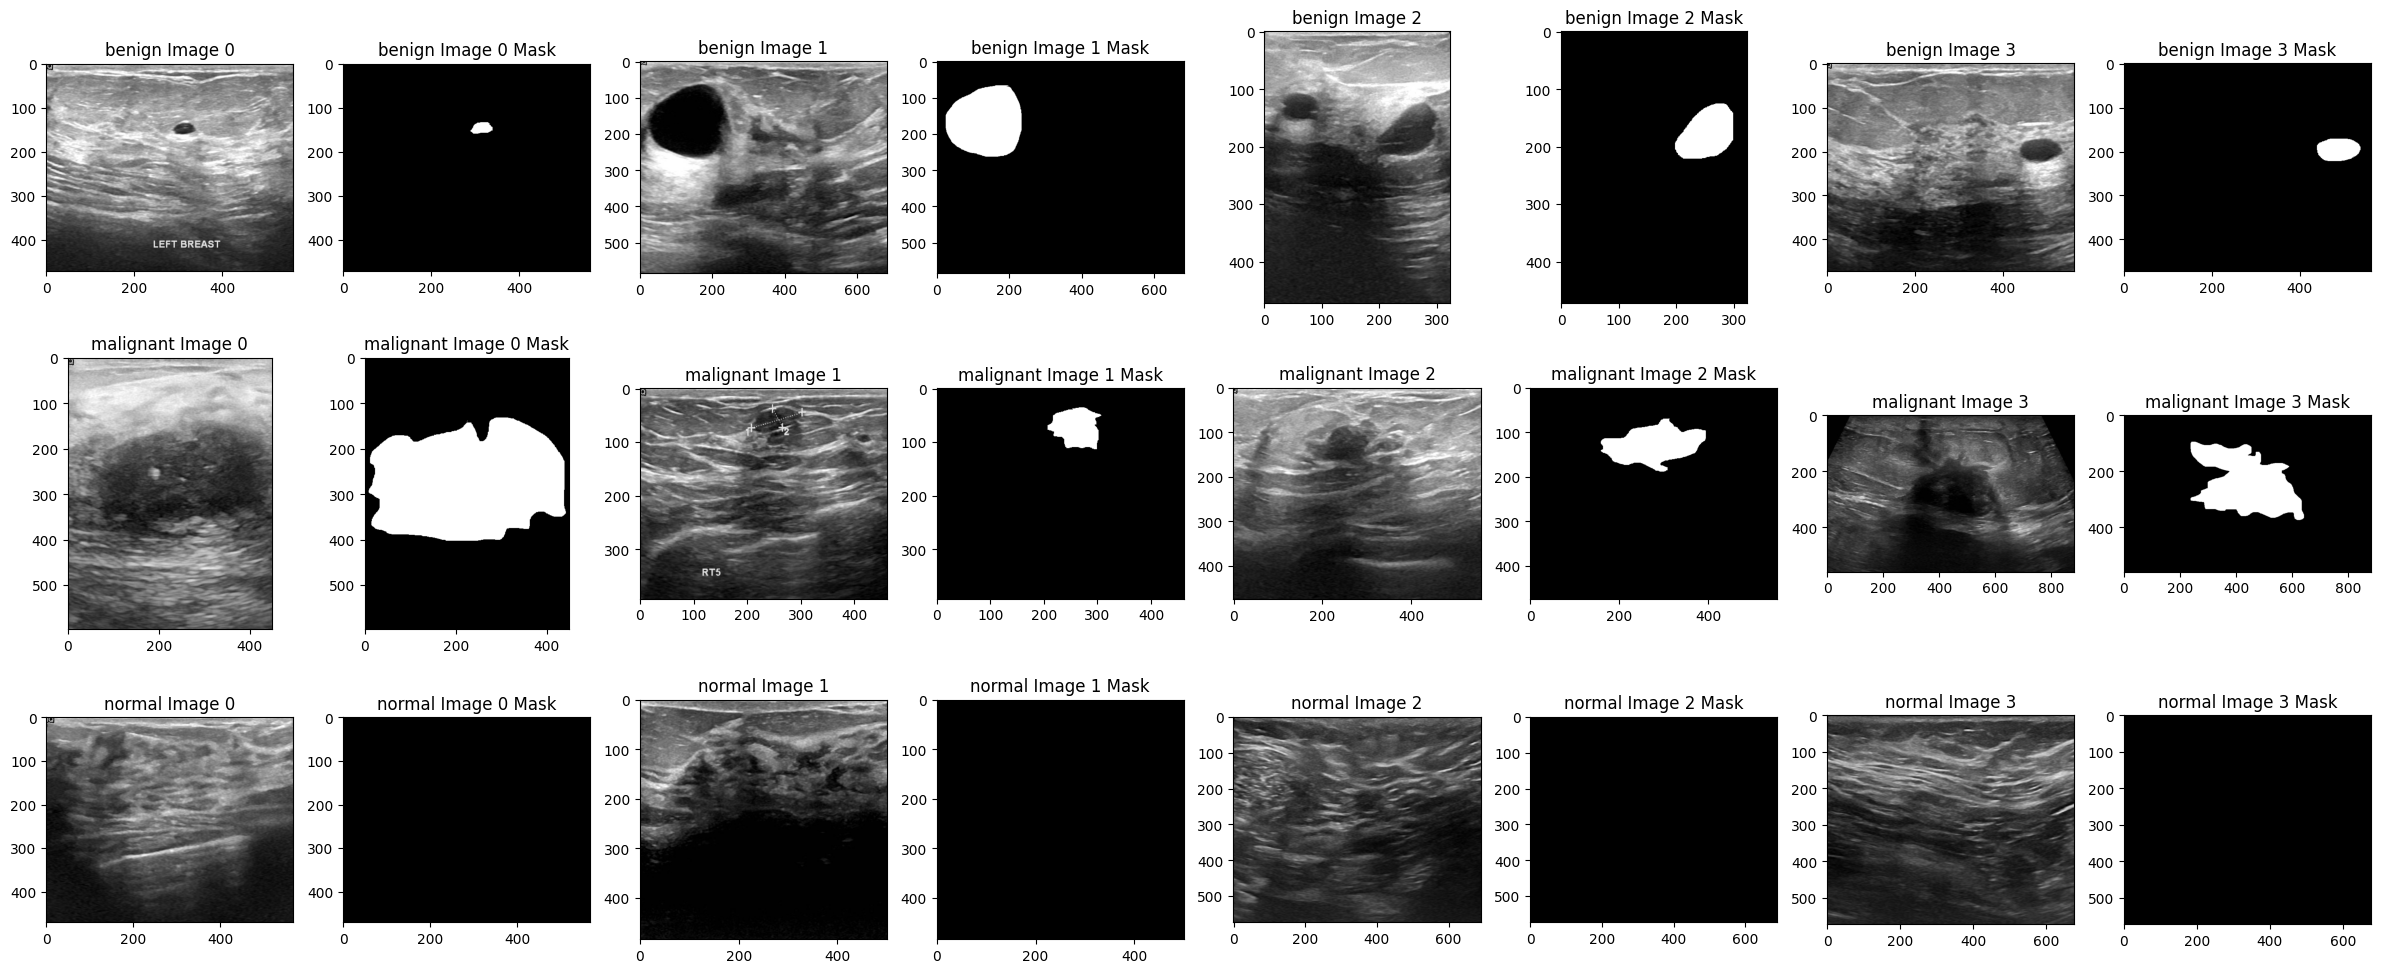

In [2]:
# Load BUSI data, original image sizes

labels = ['benign', 'malignant', 'normal']

data_dir = './datasets/MLSP Project/BUSI'

num_samples = 4

fig, axs = plt.subplots(len(labels), 2*num_samples, figsize=(30, 12))

image_sizes = []
mask_sizes = []
widths = []
heights = []

for i , label in enumerate(labels):
    dir = os.path.join(data_dir, label)
    image_filenames = [file for file in os.listdir(dir) if file.endswith(').png')]
    mask_filenames = [file for file in os.listdir(dir) if file.endswith('mask.png')]



    for j in range(num_samples):
        image_path = os.path.join(dir, image_filenames[j])
        image = Image.open(image_path)
        mask_path = os.path.join(dir, mask_filenames[j])
        mask = Image.open(mask_path)

        axs[i, 2*j].imshow(image)
        axs[i, 2*j].set_title(label + " Image " + str(j))

        axs[i, 2*j+1].imshow(mask)
        axs[i, 2*j+1].set_title(label + " Image " + str(j) + " Mask")
       
    for j in range(len(image_filenames)):
        image_path = os.path.join(dir, image_filenames[j])
        image = Image.open(image_path).convert('RGB')
        mask_path = os.path.join(dir, mask_filenames[j])
        mask = Image.open(mask_path).convert('RGB')

        image_sizes.append(np.shape(image))
        widths.append(np.shape(image)[0])
        mask_sizes.append(np.shape(mask))
        heights.append(np.shape(image)[1])
        

In [3]:
idx = np.argmax(np.linalg.norm(image_sizes, axis=1))
print("Max pixel resolution of BUSI")
print(mask_sizes[idx])
idx = np.argmin(np.linalg.norm(image_sizes, axis=1))
print("Min pixel resolution of BUSI")
print(mask_sizes[idx])

Max pixel resolution of BUSI
(578, 1048, 3)
Min pixel resolution of BUSI
(335, 190, 3)


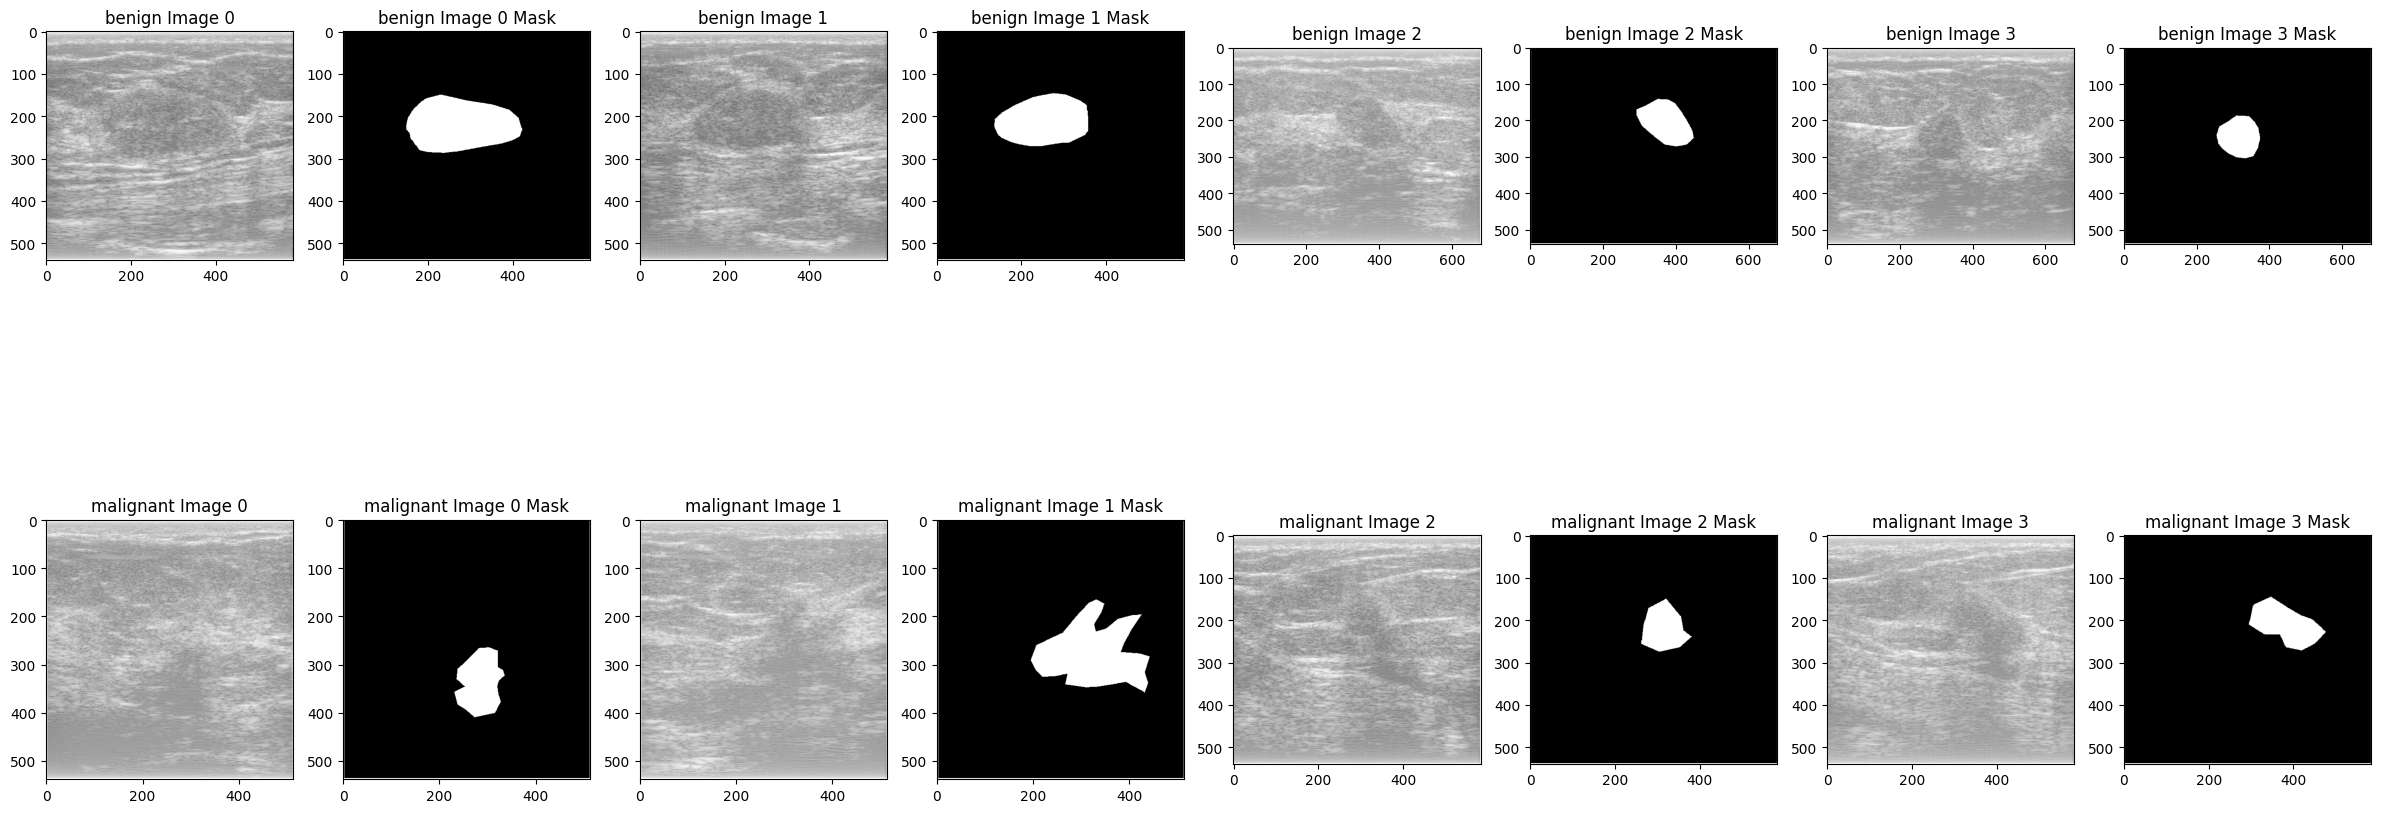

In [4]:
# Load OASBUD data, original image sizes
labels = ['benign', 'malignant']

data_dir = './datasets/MLSP Project/OASBUD'

num_samples = 4

fig, axs = plt.subplots(len(labels), 2*num_samples, figsize=(30, 12))

image_sizes = []
mask_sizes = []
widths = []
heights = []

for i , label in enumerate(labels):
    dir = os.path.join(data_dir, label)
    image_filenames = [file for file in os.listdir(dir) if file.endswith(').png')]
    mask_filenames = [file for file in os.listdir(dir) if file.endswith('mask.png')]



    for j in range(num_samples):
        image_path = os.path.join(dir, image_filenames[j])
        image = Image.open(image_path)
        mask_path = os.path.join(dir, mask_filenames[j])
        mask = Image.open(mask_path)

        axs[i, 2*j].imshow(image)
        axs[i, 2*j].set_title(label + " Image " + str(j))

        axs[i, 2*j+1].imshow(mask)
        axs[i, 2*j+1].set_title(label + " Image " + str(j) + " Mask")
       
    for j in range(len(image_filenames)):
        image_path = os.path.join(dir, image_filenames[j])
        image = Image.open(image_path).convert('RGB')
        mask_path = os.path.join(dir, mask_filenames[j])
        mask = Image.open(mask_path).convert('RGB')

        image_sizes.append(np.shape(image))
        widths.append(np.shape(image)[0])
        mask_sizes.append(np.shape(mask))
        heights.append(np.shape(image)[1])

In [5]:
idx = np.argmax(np.linalg.norm(image_sizes, axis=1))
print("Max pixel resolution of Oasbus")
print(mask_sizes[idx])
idx = np.argmin(np.linalg.norm(image_sizes, axis=1))
print("Min pixel resolution of Oasbud")
print(mask_sizes[idx])

Max pixel resolution of Oasbus
(539, 680, 3)
Min pixel resolution of Oasbud
(539, 374, 3)


Number of benign Images: 437


C:\Users\lhrho\AppData\Local\Temp\ipykernel_77864\3310248976.py:27: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = image.resize((width_resize, height_resize), Image.ANTIALIAS)
C:\Users\lhrho\AppData\Local\Temp\ipykernel_77864\3310248976.py:28: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  mask = mask.resize((width_resize, height_resize), Image.ANTIALIAS)
C:\Users\lhrho\AppData\Local\Temp\ipykernel_77864\3310248976.py:44: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = image.resize((width_resize, height_resize), Image.ANTIALIAS)
C:\Users\lhrho\AppData\Local\Temp\ipykernel_77864\3310248976.py:45: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resamplin

Number of malignant Images: 210
Number of normal Images: 133


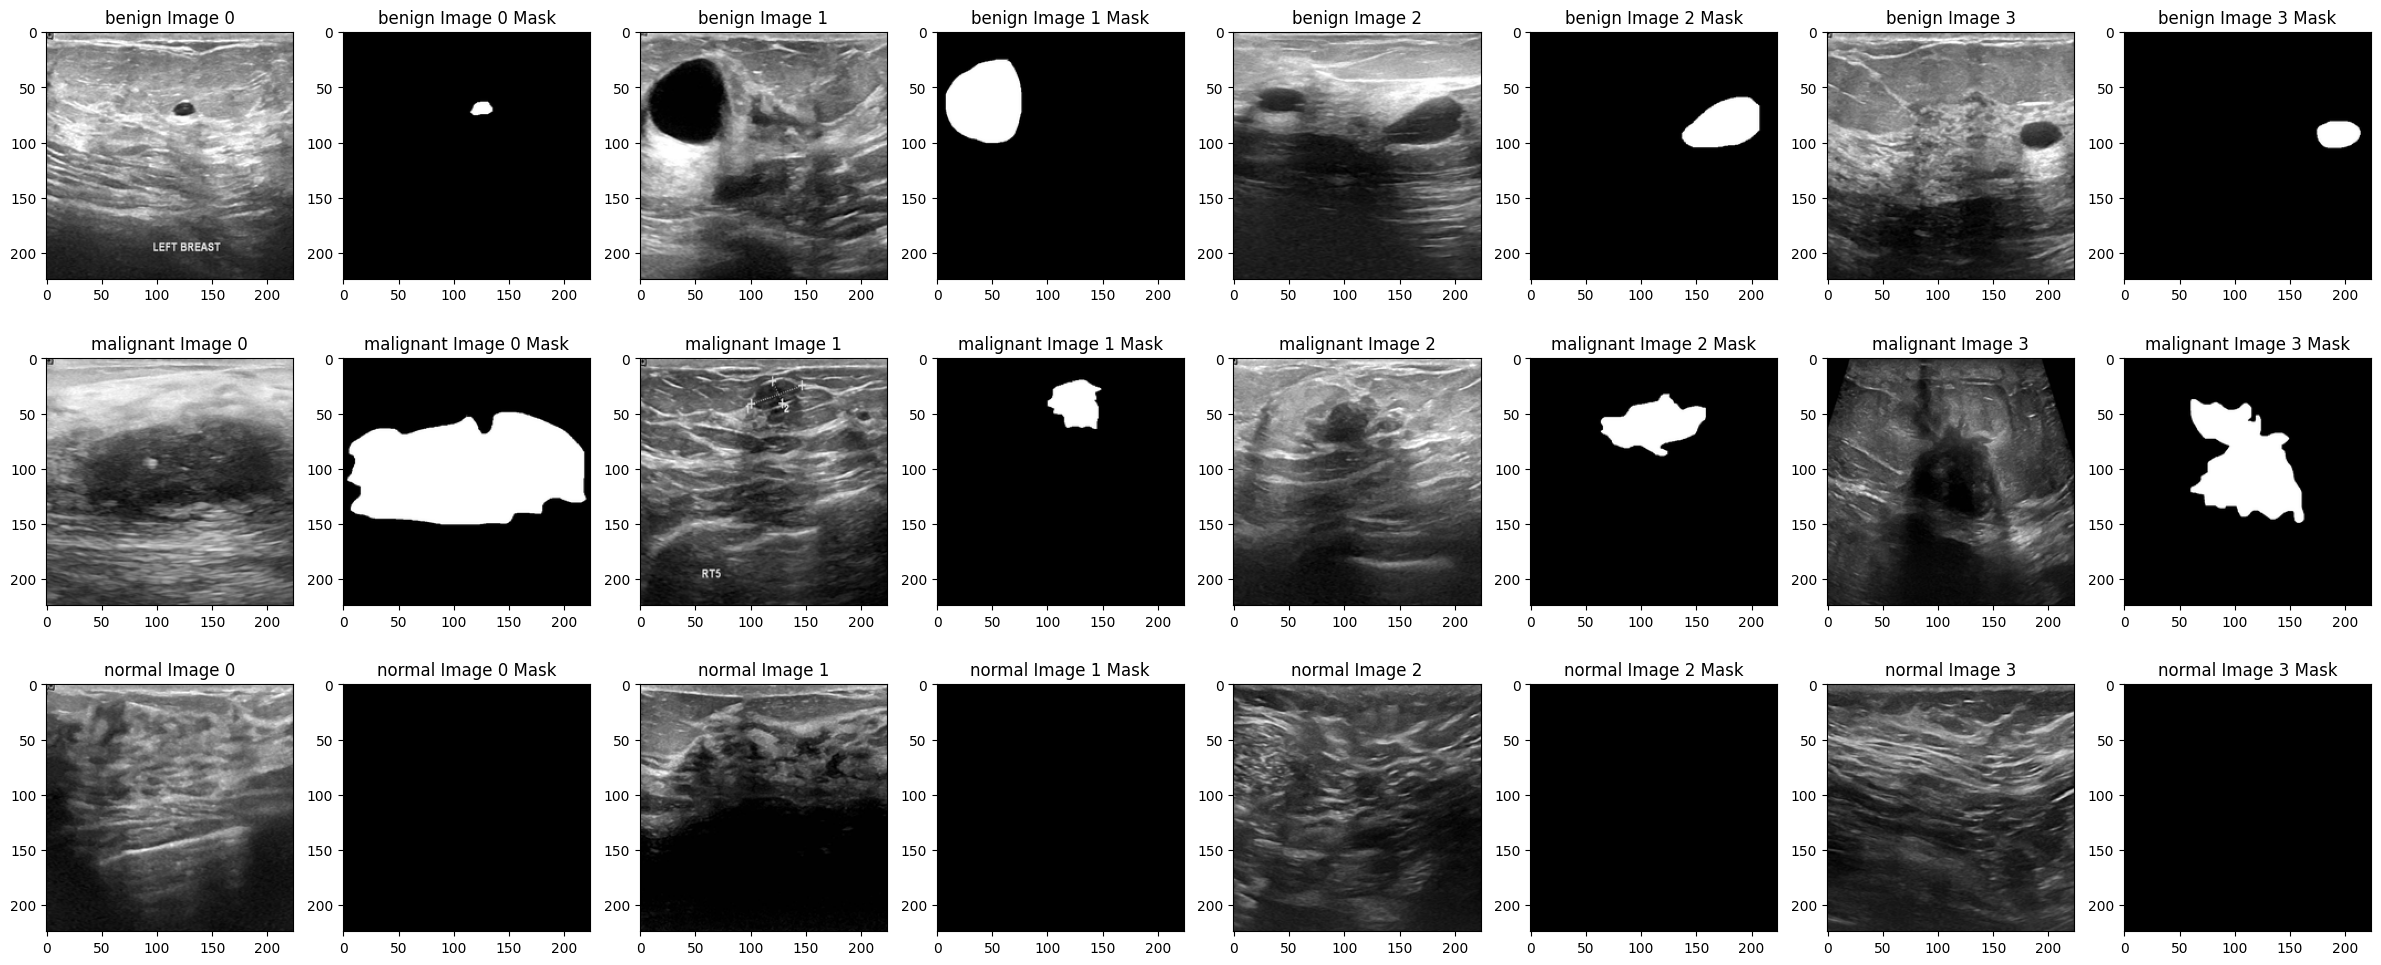

In [6]:
# Load BUSI data resized 

labels = ['benign', 'malignant', 'normal']

data_dir = './datasets/MLSP Project/BUSI'

num_samples = 4

fig, axs = plt.subplots(len(labels), 2*num_samples, figsize=(30, 12))

for i , label in enumerate(labels):
    dir = os.path.join(data_dir, label)
    image_filenames = [file for file in os.listdir(dir) if file.endswith(').png')]
    mask_filenames = [file for file in os.listdir(dir) if file.endswith('mask.png')]

    print("Number of " + label + " Images: " + str(len(image_filenames)))

    width_resize = 224
    height_resize = 224

    for j in range(num_samples):
        image_path = os.path.join(dir, image_filenames[j])
        image = Image.open(image_path).convert('RGB')
        mask_path = os.path.join(dir, mask_filenames[j])
        mask = Image.open(mask_path).convert('RGB')
        
        image = image.resize((width_resize, height_resize), Image.ANTIALIAS)
        mask = mask.resize((width_resize, height_resize), Image.ANTIALIAS)
        
        axs[i, 2*j].imshow(image)
        axs[i, 2*j].set_title(label + " Image " + str(j))

        axs[i, 2*j+1].imshow(mask)
        axs[i, 2*j+1].set_title(label + " Image " + str(j) + " Mask")
       
    for j in range(len(image_filenames)):


        image_path = os.path.join(dir, image_filenames[j])
        image = Image.open(image_path).convert('RGB')
        mask_path = os.path.join(dir, mask_filenames[j])
        mask = Image.open(mask_path).convert('RGB')

        image = image.resize((width_resize, height_resize), Image.ANTIALIAS)
        mask = mask.resize((width_resize, height_resize), Image.ANTIALIAS)

Number of benign Images: 96


C:\Users\lhrho\AppData\Local\Temp\ipykernel_77864\2232577676.py:27: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = image.resize((width_resize, height_resize), Image.ANTIALIAS)
C:\Users\lhrho\AppData\Local\Temp\ipykernel_77864\2232577676.py:28: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  mask = mask.resize((width_resize, height_resize), Image.ANTIALIAS)
C:\Users\lhrho\AppData\Local\Temp\ipykernel_77864\2232577676.py:44: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = image.resize((width_resize, height_resize), Image.ANTIALIAS)
C:\Users\lhrho\AppData\Local\Temp\ipykernel_77864\2232577676.py:45: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resamplin

Number of malignant Images: 104


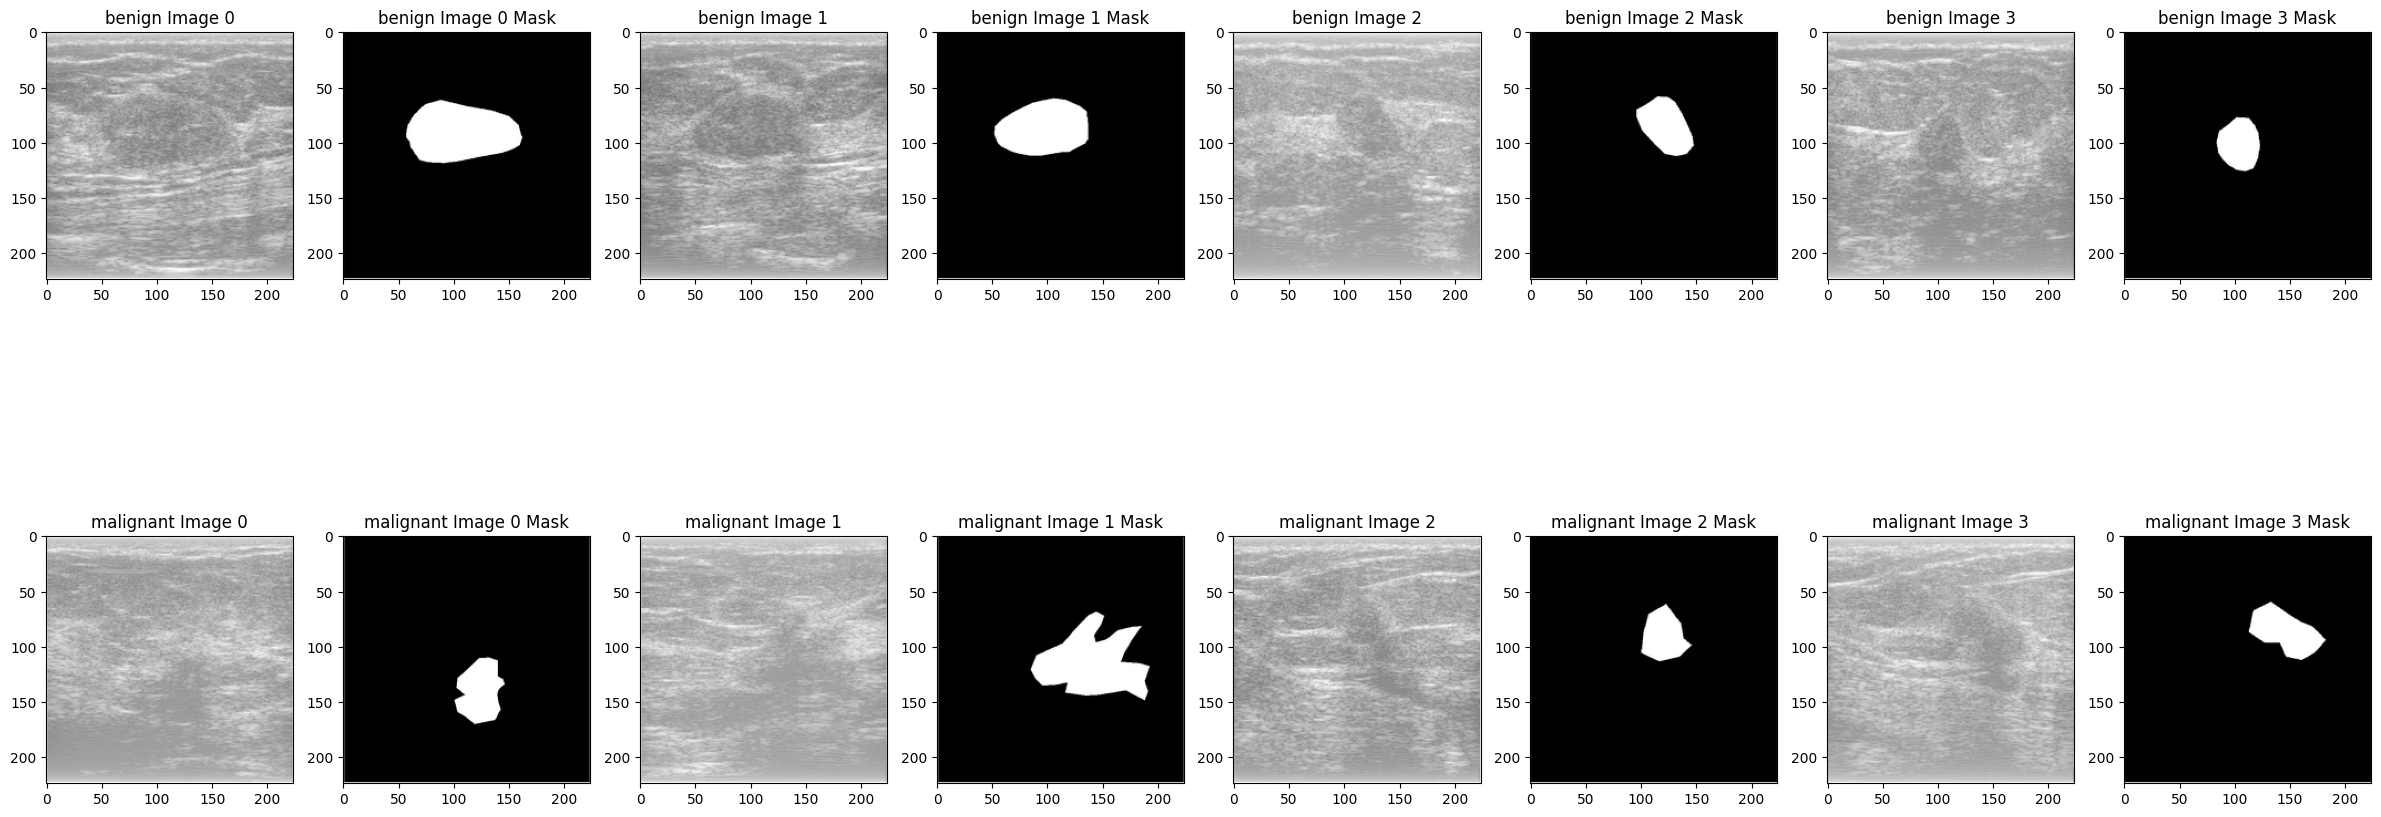

In [7]:
# Load OASBUD data resized 

labels = ['benign', 'malignant']

data_dir = './datasets/MLSP Project/OASBUD'

num_samples = 4

fig, axs = plt.subplots(len(labels), 2*num_samples, figsize=(30, 12))

for i , label in enumerate(labels):
    dir = os.path.join(data_dir, label)
    image_filenames = [file for file in os.listdir(dir) if file.endswith(').png')]
    mask_filenames = [file for file in os.listdir(dir) if file.endswith('mask.png')]

    print("Number of " + label + " Images: " + str(len(image_filenames)))

    width_resize = 224
    height_resize = 224

    for j in range(num_samples):
        image_path = os.path.join(dir, image_filenames[j])
        image = Image.open(image_path).convert('RGB')
        mask_path = os.path.join(dir, mask_filenames[j])
        mask = Image.open(mask_path).convert('RGB')
        
        image = image.resize((width_resize, height_resize), Image.ANTIALIAS)
        mask = mask.resize((width_resize, height_resize), Image.ANTIALIAS)
        
        axs[i, 2*j].imshow(image)
        axs[i, 2*j].set_title(label + " Image " + str(j))

        axs[i, 2*j+1].imshow(mask)
        axs[i, 2*j+1].set_title(label + " Image " + str(j) + " Mask")
       
    for j in range(len(image_filenames)):


        image_path = os.path.join(dir, image_filenames[j])
        image = Image.open(image_path).convert('RGB')
        mask_path = os.path.join(dir, mask_filenames[j])
        mask = Image.open(mask_path).convert('RGB')

        image = image.resize((width_resize, height_resize), Image.ANTIALIAS)
        mask = mask.resize((width_resize, height_resize), Image.ANTIALIAS)

In [8]:
classes = ['malignant', 'normal', 'benign']
transform = transforms.Compose([transforms.ToTensor()])
"""
    [transforms.Resize(256),
     transforms.RandomHorizontalFlip(),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
"""

'\n    [transforms.Resize(256),\n     transforms.RandomHorizontalFlip(),\n     transforms.ToTensor(),\n     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])\n'

In [9]:
classes = ['benign', 'malignant', 'normal']

data_dir = './datasets/MLSP Project/BUSI'
image_filenames = []
labels = []

for i, class_label in enumerate(classes):
    dir  = os.path.join(data_dir, class_label)
    for file in os.listdir(dir):
        if file.endswith(').png'):
            image_filenames.append(file)
            labels.append(class_label)

class Breat_Cancer_Dataset():
    def __init__(self, labels, data_dir, image_filenames, mask_filenames, transform=None):
        self.labels = labels
        self.data_dir = data_dir
        self.image_filenames = image_filenames
        self.mask_filenames = mask_filenames
        self.transform = transform
    
    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        
        #image_path = os.path.join(self.data_dir, self.labels[idx], self.image_filenames[idx])
        image_path = os.path.join(self.data_dir, self.image_filenames[idx])
        image = Image.open(image_path).convert('RGB')
        
        #mask_path = os.path.join(self.data_dir, self.labels[idx], self.mask_filenames[idx])
        mask_path = os.path.join(self.data_dir, self.mask_filenames[idx])
        mask = Image.open(mask_path).convert('RGB')
        
        label = self.labels[idx]

        width_resize = 224
        height_resize = 224
        image = image.resize((width_resize, height_resize), Image.ANTIALIAS)
        mask = mask.resize((width_resize, height_resize), Image.ANTIALIAS)

        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)

        sample = {'image': image, 'mask': mask, 'label': label}

        

        return sample

C:\Users\lhrho\AppData\Local\Temp\ipykernel_77864\3317031230.py:41: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = image.resize((width_resize, height_resize), Image.ANTIALIAS)
C:\Users\lhrho\AppData\Local\Temp\ipykernel_77864\3317031230.py:42: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  mask = mask.resize((width_resize, height_resize), Image.ANTIALIAS)


0 torch.Size([3, 224, 224]) torch.Size([3, 224, 224]) benign
1 torch.Size([3, 224, 224]) torch.Size([3, 224, 224]) benign
2 torch.Size([3, 224, 224]) torch.Size([3, 224, 224]) benign
3 torch.Size([3, 224, 224]) torch.Size([3, 224, 224]) benign


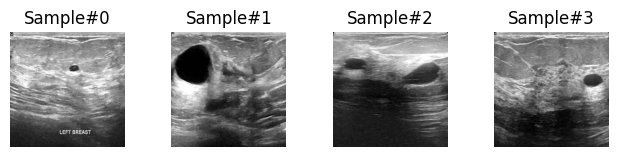

In [10]:
# Load BUSI data resized 
classes = ['benign', 'malignant', 'normal']

data_dir = './datasets/MLSP Project/BUSI'
image_filenames = []
mask_filenames = []
labels = []

for i, class_label in enumerate(classes):
    dir  = os.path.join(data_dir, class_label)
    for file in os.listdir(dir):
        if file.endswith(').png'):
            image_filenames.append(os.path.join(data_dir, class_label, file))
            labels.append(class_label)
        if file.endswith('mask.png'):
            mask_filenames.append(os.path.join(data_dir, class_label, file))

# Load OASBUD data resized 

classes = ['benign', 'malignant']

data_dir = './datasets/MLSP Project/OASBUD'

for i , class_label in enumerate(classes):
    dir = os.path.join(data_dir, class_label)

    for file in os.path.join(data_dir, class_label):
        if file.endswith(').png'):
            image_filenames.append(os.path.join(data_dir, class_label, file))
            labels.append(class_label)
        if file.endswith('mask.png'):
            mask_filenames.append(os.path.join(data_dir, class_label, file))

data_dir = './'


Breast_cancer_dataset = Breat_Cancer_Dataset(labels, data_dir, image_filenames, mask_filenames, transform=transform)
fig = plt.figure()
for i, sample in enumerate(Breast_cancer_dataset):
    print(i, np.shape(sample['image']), np.shape(sample['mask']), sample['label'])

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample#{}'.format(i))
    ax.axis('off')
    ax.imshow(sample['image'].permute(1, 2, 0))
    if i == 3:
        plt.show()
        break

In [11]:
from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(Breast_cancer_dataset, test_size=0.15, random_state=42)
trainset, valset = train_test_split(trainset, test_size=0.15, random_state=42)

C:\Users\lhrho\AppData\Local\Temp\ipykernel_77864\3317031230.py:41: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = image.resize((width_resize, height_resize), Image.ANTIALIAS)
C:\Users\lhrho\AppData\Local\Temp\ipykernel_77864\3317031230.py:42: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  mask = mask.resize((width_resize, height_resize), Image.ANTIALIAS)


In [12]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True, num_workers=2)

valloader = torch.utils.data.DataLoader(valset, batch_size=32,
                                         shuffle=False, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                         shuffle=False, num_workers=2)

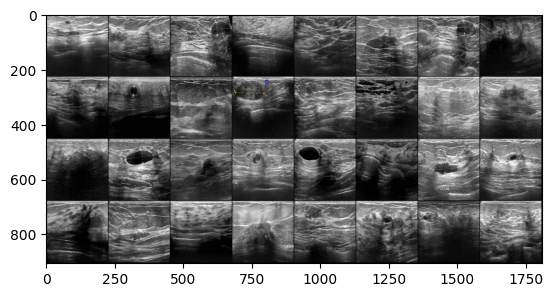

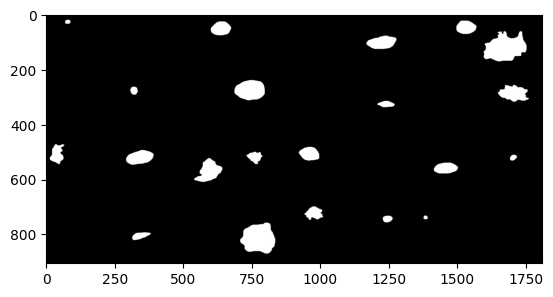

In [13]:
dataiter = iter(trainloader)
sample = next(dataiter)

def imshow(img):
    img = img   # unnormalize
    npimg = img.numpy()
    plt.figure()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

imshow(torchvision.utils.make_grid(sample['image']))
imshow(torchvision.utils.make_grid(sample['mask']))